In [ ]:
#%%

import scanpy as sc
import os

In [ ]:
#%%

ori_path = "/group/testa/Project/OvarianAtlasTestStep0/raw_data/integration/cells/cancer/cells_hdg_patients_batch_corr_scgen_tissuetreat_embeddings_HDG.h5ad"
adata = sc.read_h5ad(ori_path)

In [ ]:
# %%

ori_path = "/group/testa/Project/OvarianAtlas/atlas_project/raw_data/integration_backup/integration/cells/cancer/cells_hdg_patients_batch_corr_scgen_tissuetreat_embeddings_HDG.h5ad"
adata_ma = sc.read_h5ad(ori_path)

In [ ]:
#%%

adata_ma.obs["SEACell2"] = adata.obs["SEACell"]
del adata
adata_ma.obs['SEACell_patient_tissue'] = adata_ma.obs['SEACell'].astype('str') + '_' + adata_ma.obs['paper_ID'].astype('str') + '_' + adata_ma.obs['tissue'].astype('str')
adata_ma.obs['SEACell2_patient_tissue'] = adata_ma.obs['SEACell2'].astype('str') + '_' + adata_ma.obs['paper_ID'].astype('str') + '_' + adata_ma.obs['tissue'].astype('str')

In [ ]:
# %%

import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [ ]:
#%%

import pandas as pd
def celltype_frac(x, col_name):
    val_counts = x[col_name].value_counts()
    return val_counts.values[0] / val_counts.values.sum()


def compute_celltype_purity(ad, col_name):
    """
    Compute the purity (prevalence of most abundant value) of the specified col_name from ad.obs within each metacell.
    @param: ad - AnnData object with SEACell assignment and col_name in ad.obs dataframe
    @param: col_name - (str) column name within ad.obs representing celltype groupings for each cell.
    """

    celltype_fraction = ad.obs.groupby('SEACell_patient_tissue').apply(lambda x: celltype_frac(x, col_name))
    celltype = ad.obs.groupby('SEACell_patient_tissue').apply(lambda x: x[col_name].value_counts().index[0])

    return pd.concat([celltype, celltype_fraction], axis=1).rename(columns={0: col_name, 1: f'{col_name}_purity'})

In [ ]:
#%%

purity = compute_celltype_purity(adata_ma, "SEACell2_patient_tissue")

In [ ]:
# %%

adata_ma_na = adata_ma[~adata_ma.obs.SEACell.isna(), :]
purity_na = compute_celltype_purity(adata_ma_na, "SEACell2_patient_tissue")

array([[<Axes: title={'center': 'SEACell2_patient_tissue_purity'}>]],
      dtype=object)

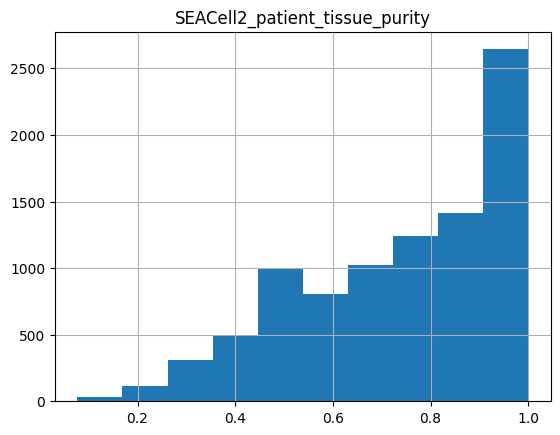

In [ ]:
purity.hist()

array([[<Axes: title={'center': 'SEACell2_patient_tissue_purity'}>]],
      dtype=object)

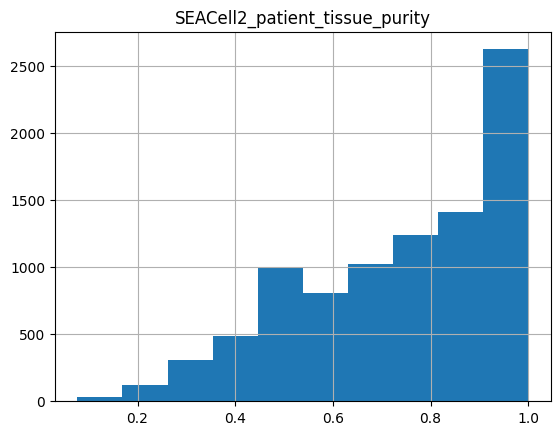

In [ ]:
purity_na.hist()

In [ ]:
adata_ma.obs.SEACell_patient_tissue.value_counts()

nan_Olbrecht_6_Metastasis            624
nan_Zhang_3_Metastasis               602
nan_Geistlinger_90_Metastasis        566
nan_Zhang_153_Metastasis             521
nan_Xu_6_Primary                     507
                                    ... 
SEACell-10_Vasquez_081_Metastasis      1
SEACell-37_Vasquez_081_Metastasis      1
SEACell-47_Vasquez_081_Metastasis      1
SEACell-18_Vasquez_052_Metastasis      1
SEACell-39_Vasquez_081_Metastasis      1
Name: SEACell_patient_tissue, Length: 9073, dtype: int64

In [ ]:
adata_ma.obsm

AxisArrays with keys: X_pca, X_umap, corrected_latent, latent

In [ ]:
# %%

ori_path = "/group/testa/Project/OvarianAtlas/atlas_project/raw_data/integration_backup/integration/cells/cancer/cells_hdg_patients_batch_corr_scgen_tissuetreat_embeddings_HDG.h5ad"
adata_ma = sc.read_h5ad(ori_path)

In [ ]:
#%%

ori_path = "/group/testa/Project/OvarianAtlasTestStep0/raw_data/integration/cells/cancer/cells_hdg_patients_batch_corr_scgen_tissuetreat_embeddings_HDG.h5ad"
adata = sc.read_h5ad(ori_path)